# Machine Learning - Supervised Learning - Classification And Regression Trees

## Trees For Classification

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("BreastCancer.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [14]:
x = data.iloc[:, :9]
y = data.iloc[:, 9]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

In [39]:
clt = DecisionTreeClassifier()
clt.fit(x_train, y_train)

DecisionTreeClassifier()

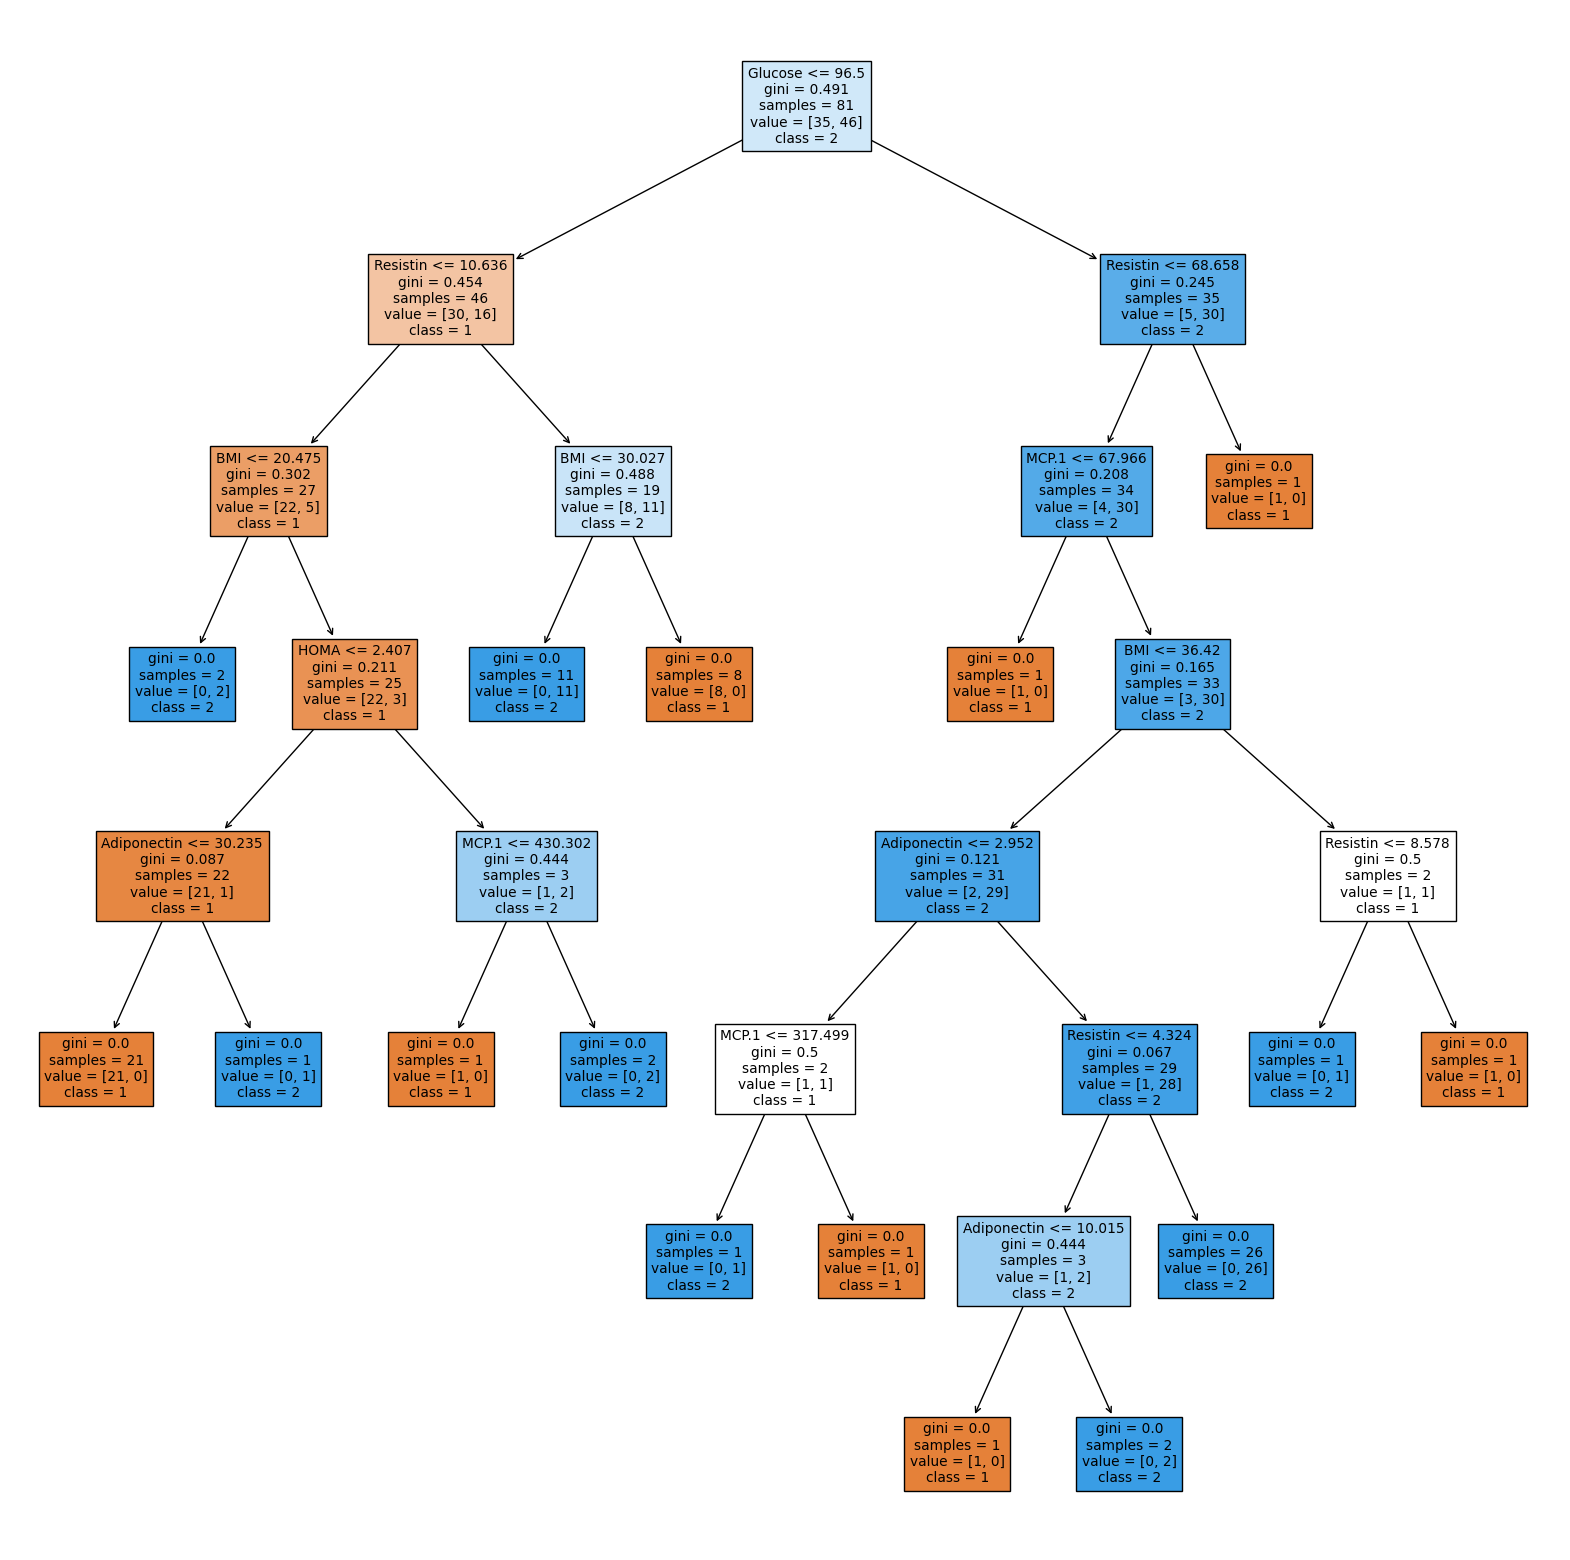

In [43]:
plt.figure(figsize = (20, 20))
plot_tree(clt, feature_names = data.columns, class_names = ["1", "2"], filled = True)
plt.show()

In [44]:
y_pred = clt.predict(x_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[ 8,  9],
       [ 4, 14]])

In [46]:
accuracy_score(y_test, y_pred)

0.6285714285714286

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.47      0.55        17
           2       0.61      0.78      0.68        18

    accuracy                           0.63        35
   macro avg       0.64      0.62      0.62        35
weighted avg       0.64      0.63      0.62        35



*This model is overfitted because until we getting pure homoginity split trees into several nodes, and model trainde up to the last infomation. Look final nodes gini is = 0, fully homogenius, to prevent overfitting we use **Pruning** technique*

## **Pruning**

* **Pre-pruning (early stopping)**: Stop growing the tree before it reaches perfect homogeneity. Criteria can include maximum depth, minimum number of samples per leaf, or a threshold for impurity decrease.
* **Post-pruning**: Grow the tree to full depth and then trim branches that provide little predictive power.

consider Pre-pruning

In [48]:
clt_pruning = DecisionTreeClassifier(max_depth= 3)   # Here "max_depth" also a hyper perameter
clt_pruning.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

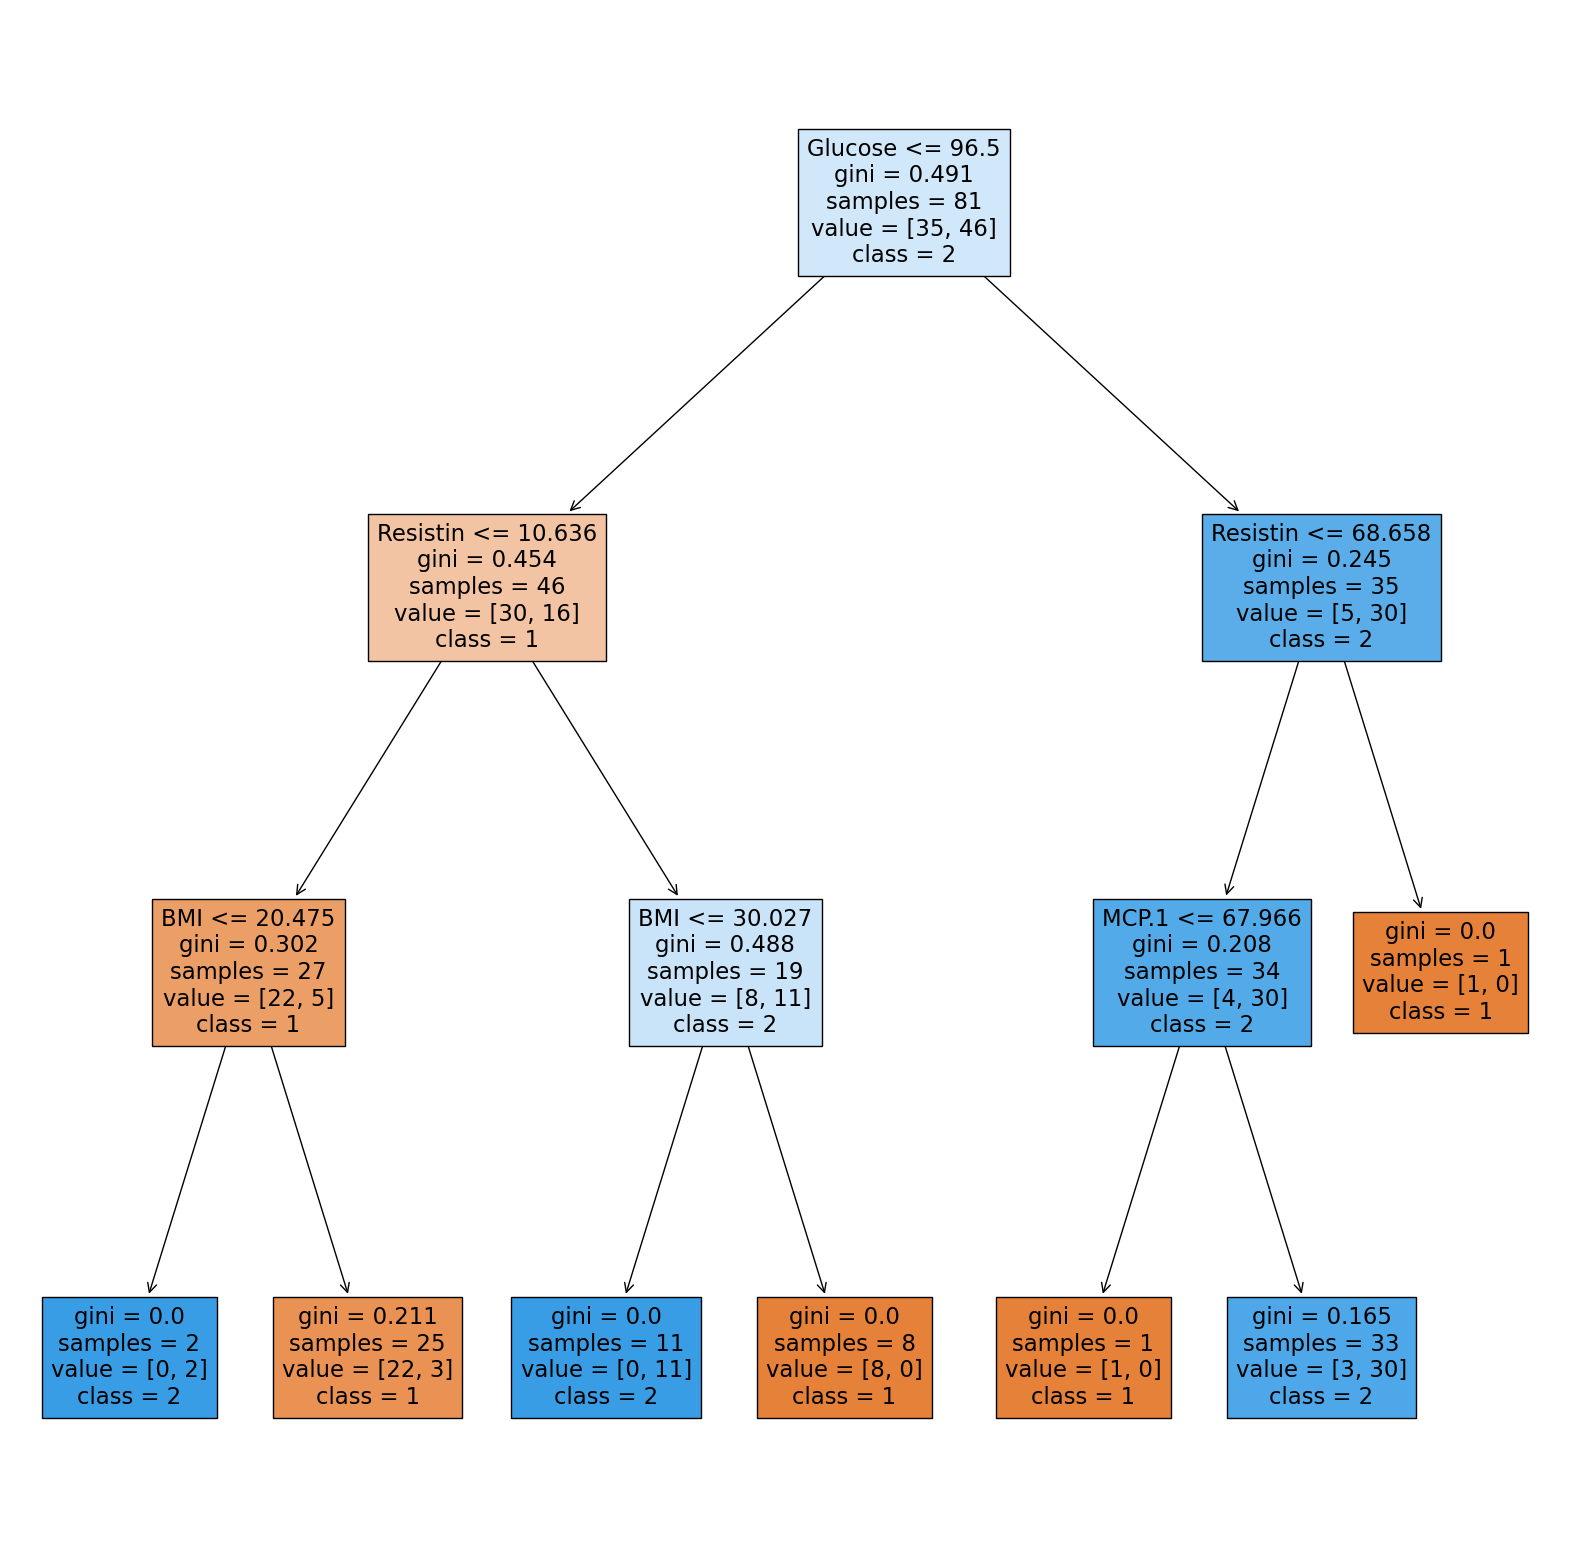

In [49]:
plt.figure(figsize = (20, 20))
plot_tree(clt_pruning, feature_names=data.columns, class_names=["1", "2"], filled = True) # imported library, classes can use directly
plt.show()

In [50]:
y_pred_pruning = clt_pruning.predict(x_test)
accuracy_score(y_test, y_pred_pruning) # increased

0.6571428571428571

In [51]:
print(classification_report(y_test, y_pred_pruning))

              precision    recall  f1-score   support

           1       0.69      0.53      0.60        17
           2       0.64      0.78      0.70        18

    accuracy                           0.66        35
   macro avg       0.66      0.65      0.65        35
weighted avg       0.66      0.66      0.65        35



# Trees for Regression with Pruning

Since regression,  gini is replaced by MSE

In [71]:
data_b = pd.read_csv("Boston.csv")
data_b.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
xb = data_b.iloc[:, :12].values
yb = data_b.iloc[:, 12].values

In [81]:
xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size=0.2, random_state=0)

In [82]:
reg_tree = DecisionTreeRegressor(max_depth=3)
reg_tree.fit(xb_train, yb_train)

DecisionTreeRegressor(max_depth=3)

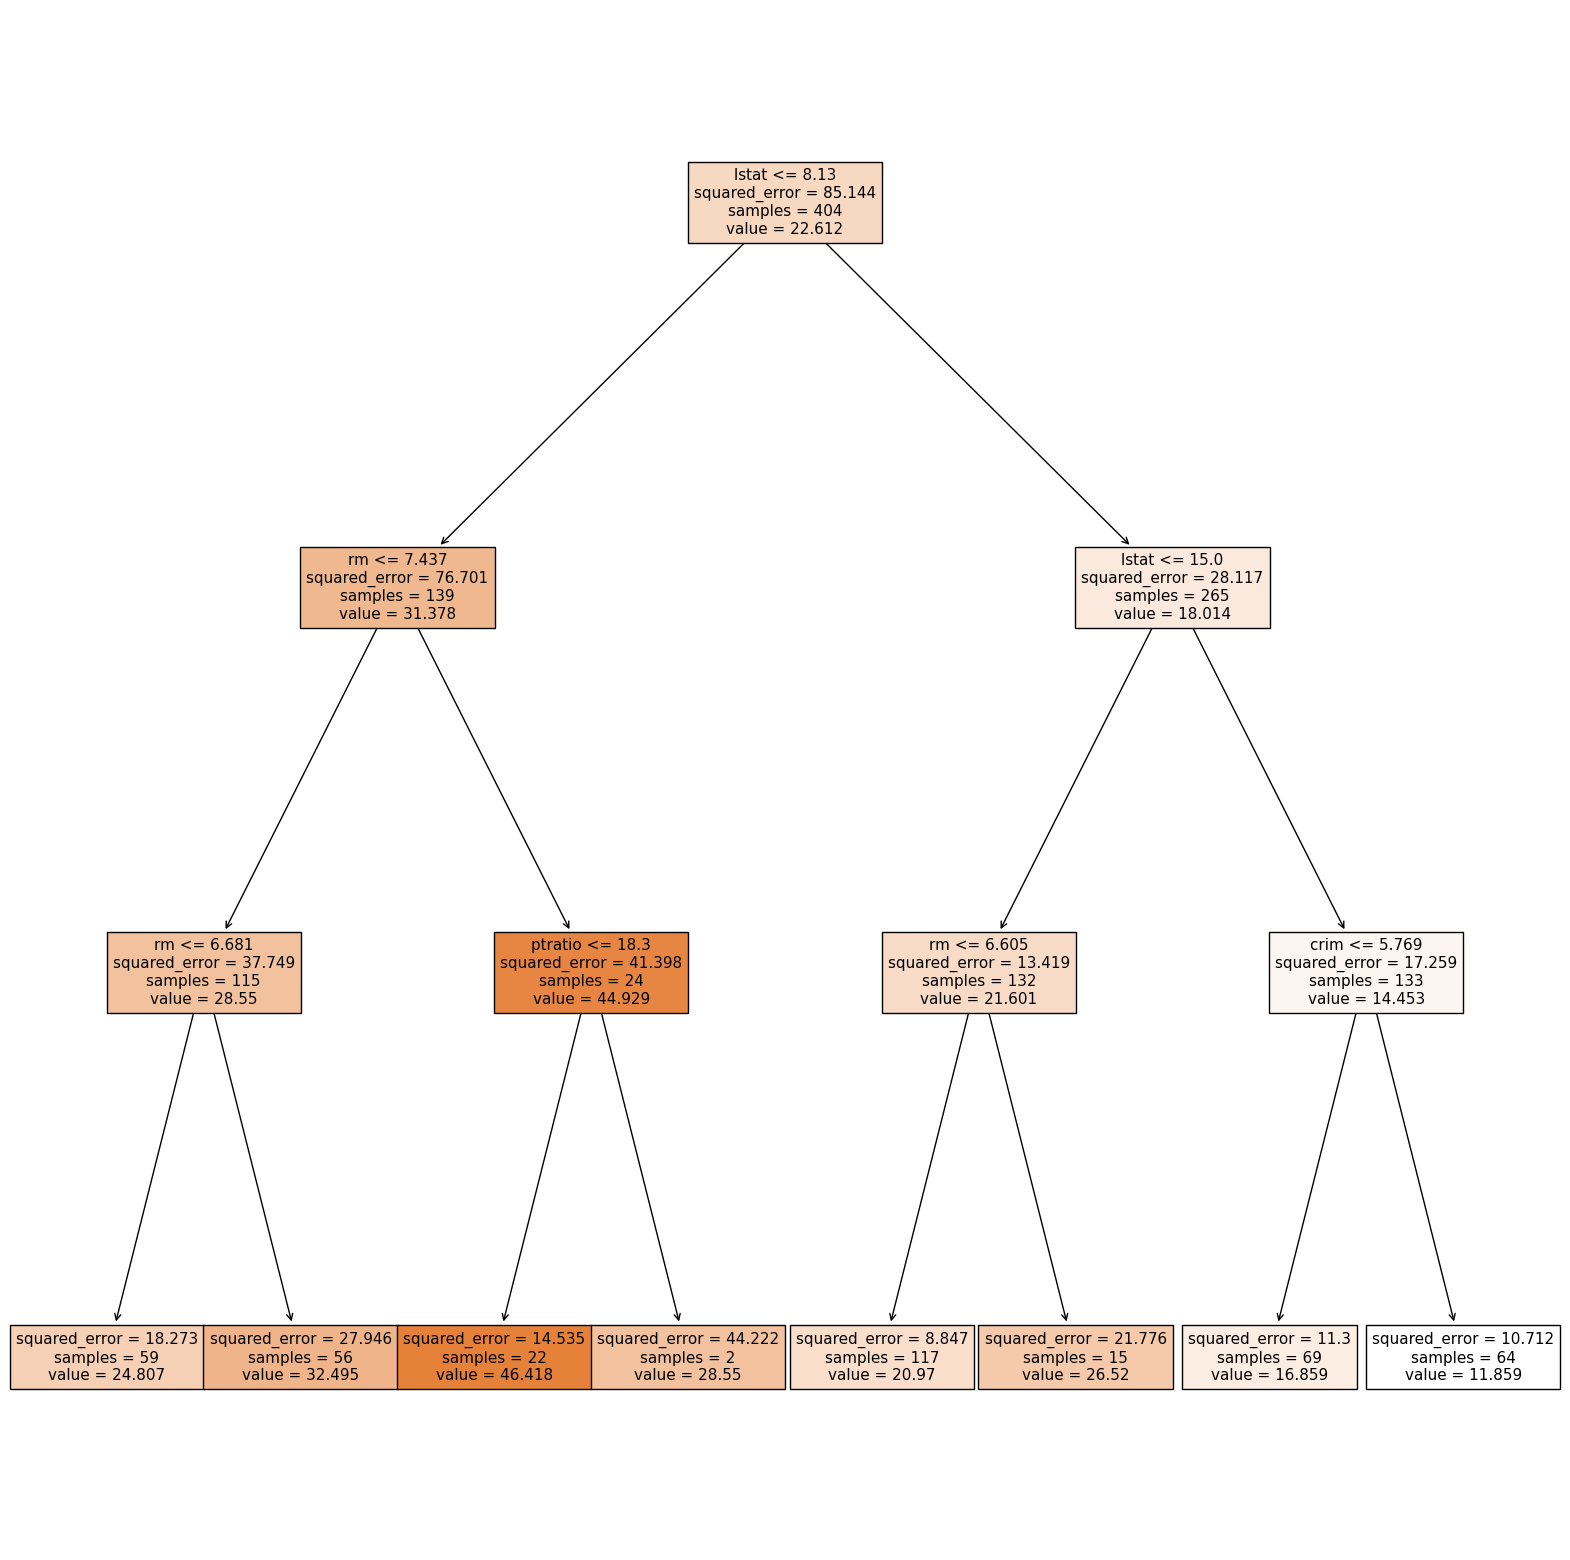

In [83]:
plt.figure(figsize = (20, 20))
plot_tree(reg_tree, feature_names=data_b.columns, filled = True) # no class names since regressions
plt.show()

In [84]:
y_pred_reg = reg_tree.predict(xb_test)
RMSE = np.sqrt(mean_squared_error(yb_test, y_pred_reg))
print(RMSE)

5.780248099742715


# Random Forest Classification and Regression

* ndom Forests are powerful and versatile machine learning models that leverage the strengths of multiple decision trees to produce robust and accurate predictions. They are particularly useful when dealing with large datasets and high-dimensional feature spaces, providing improved generalization and reduced risk of overfitting compared to single decision trees.

## Random Forest Overview

**Definition**:

* A Random Forest is an ensemble of decision trees, typically trained with the "bagging" method, where multiple trees are trained on random subsets of the data and their outputs are aggregated (e.g., by majority vote for classification or averaging for regression).

**Key Concepts**:

* **Bagging (Bootstrap Aggregating)**: Involves randomly sampling the training data with replacement to create multiple different subsets (bootstrap samples).
* **Random Subspace Method**: For each split in the tree, a random subset of features is chosen as candidates to find the best split. This introduces additional randomness and helps in reducing correlation between trees.

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

## Classification

In [88]:
data_bank = pd.read_csv("Bank.csv")
data_bank.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [90]:
x = data_bank.iloc[:, :7]
y = data_bank.iloc[:, 7]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [99]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train, y_train)
y_pred_rfcl = rfcl.predict(x_test)
print(accuracy_score(y_test, y_pred_rfcl))

0.9053168244719592


### Let work with two hyper parameters and optimization

In [111]:
params = {"n_estimators": [100, 500, 1000], "criterion": ["gini" , "entropy"]} # hyper perameters, check ?RandomForestClassifier
model = RandomForestClassifier()
cvals = KFold(n_splits=5)

In [112]:
grid_search = GridSearchCV(estimator= model, param_grid= params, cv = cvals) # create an adavanced model no time
results = grid_search.fit(x_train, y_train) # more time to fit the data to above model

In [117]:
results.best_params_

{'criterion': 'entropy', 'n_estimators': 1000}

## Regression

In [119]:
data_bank = pd.read_csv("Boston.csv")
data_bank.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [120]:
xr = data_bank.iloc[:, :12]
yr = data_bank.iloc[:, 12]

In [121]:
xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size=0.2, random_state=0)

In [128]:
rfrg = RandomForestRegressor()
rfrg.fit(xr_train, yr_train)
y_pred_rfrg = rfrg.predict(xr_test)
RMSE = np.sqrt(mean_squared_error(yr_test, y_pred_rfrg))
print(RMSE)

4.391874663378217


### Let do hyper parameter optimization(two)

In [139]:
params = {"n_estimators": [100, 500, 1000], "criterion": ["squared_error" , "absolute_error"]} # hyper perameters(n_estimators,criterion)  
model = RandomForestRegressor() # check ?RandomForestRegressor for more info
cvals = KFold(n_splits=5)

In [135]:
grid_search_reg = GridSearchCV(estimator= model, param_grid= params, cv = cvals) # create an adavanced model no time
result = grid_search_reg.fit(xr_train, yr_train) # more time to fit the data to above model

In [137]:
result.best_params_

{'criterion': 'squared_error', 'n_estimators': 100}